<li style="font-family:'Goudy Old Style';font-weight: bold;font-size:40px;color:  #c1531f   ">About the dataset</li>

[Reference](https://www.kaggle.com/c/song-popularity-prediction/discussion/301616)  
Source - Spotify: "In Spotify's API is something called Valence, that describes the musical positiveness conveyed by a track. Tracks with high valence sound more positive (happy, cheerful, euphoric), while tracks with low valence sound more negative (sad, depressed, angry)."

From very good article explaining Spotify API What Makes a Song Likeable?- https://towardsdatascience.com/what-makes-a-song-likeable-dbfdb7abe404 we can read that:

**Spotify Audio Features**
For every track on their platform, Spotify provides data for thirteen Audio Features.The Spotify Web API developer guide defines them as follows:

**Danceability:** Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.

**Valence:** Describes the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

**Energy:** Represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.

**Tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece, and derives directly from the average beat duration.

**Loudness:** The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks.

**Speechiness:** This detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
Instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”.

**Liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.

**Acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic.

**Key:** The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.

**Mode:** Indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

**Duration:** The duration of the track in milliseconds.

**Time Signature:** An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
test= pd.read_csv('../input/song-popularity-prediction/test.csv')
sub = pd.read_csv('../input/song-popularity-prediction/sample_submission.csv')
print("Sample Submission Head(2)")
display(sub.head(2))
print("Test Dataset Head(2)")
test.head(2)

Sample Submission Head(2)


,id,song_popularity
0,0,0
1,1,0


Test Dataset Head(2)


,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0,308523.0,0.019845,NaN,0.908939,0.001438,NaN,0.112832,-8.890172,0,0.082714,126.129304,4,0.399620
1,1,200011.0,0.070119,0.731256,0.444655,0.002020,10.0,0.139040,-6.301214,0,0.061685,86.448149,3,0.499424


In [3]:
df= pd.read_csv('../input/song-popularity-prediction/train.csv')
df

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
0,0,212990.0,0.642286,0.856520,0.707073,0.002001,10.0,NaN,-5.619088,0,0.082570,158.386236,4,0.734642,0
1,1,NaN,0.054866,0.733289,0.835545,0.000996,8.0,0.436428,-5.236965,1,0.127358,102.752988,3,0.711531,1
2,2,193213.0,NaN,0.188387,0.783524,-0.002694,5.0,0.170499,-4.951759,0,0.052282,178.685791,3,0.425536,0
3,3,249893.0,0.488660,0.585234,0.552685,0.000608,0.0,0.094805,-7.893694,0,0.035618,128.715630,3,0.453597,0
4,4,165969.0,0.493017,NaN,0.740982,0.002033,10.0,0.094891,-2.684095,0,0.050746,121.928157,4,0.741311,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,39995,237799.0,NaN,0.748942,0.511234,0.002913,0.0,0.173803,-8.853673,0,0.078060,168.262924,3,0.178159,0
39996,39996,191119.0,0.067488,0.672830,0.889685,0.001225,5.0,0.122924,-7.798993,0,0.188607,110.684544,3,0.790626,0
39997,39997,160879.0,0.877431,0.409065,0.292671,NaN,10.0,0.110664,-15.378585,0,0.031294,99.556074,3,0.177947,1
39998,39998,193918.0,NaN,0.365738,NaN,0.000339,1.0,0.356308,-4.661977,1,0.054096,139.857384,3,0.772978,0


<li style="font-family:'Goudy Old Style';font-weight: bold;font-size:20px;color: #c1531f  "> Data distribution of train set</li>

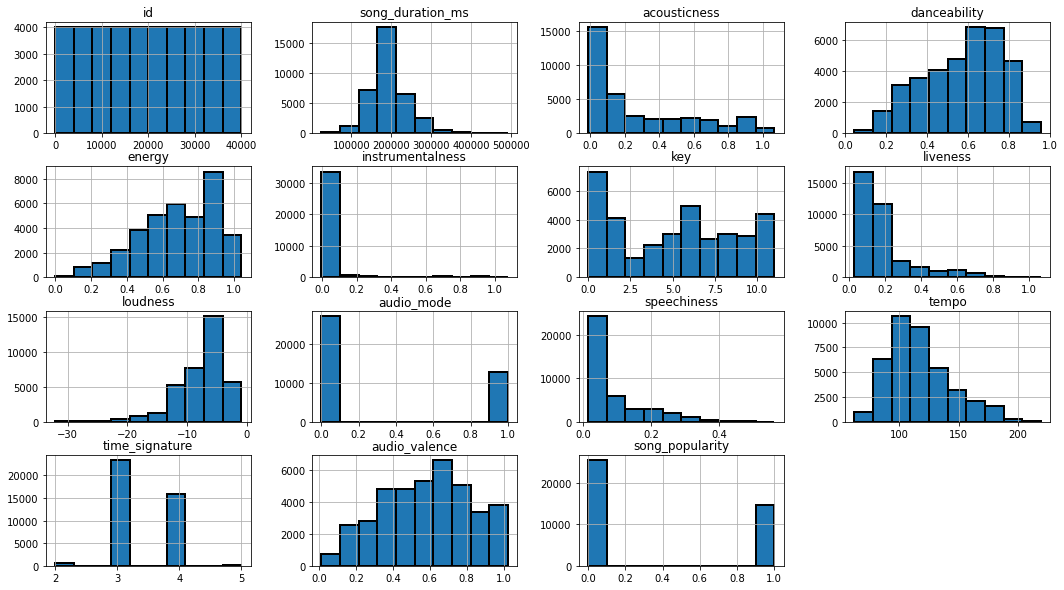

In [4]:
### Over all view of data 
#print('Data distribution of training set')
df.hist(figsize=(18,10), edgecolor='black',linewidth=2);

<li style="font-family:'Goudy Old Style';font-weight: bold;font-size:20px;color: #c1531f  "> Data distribution of test set</li>

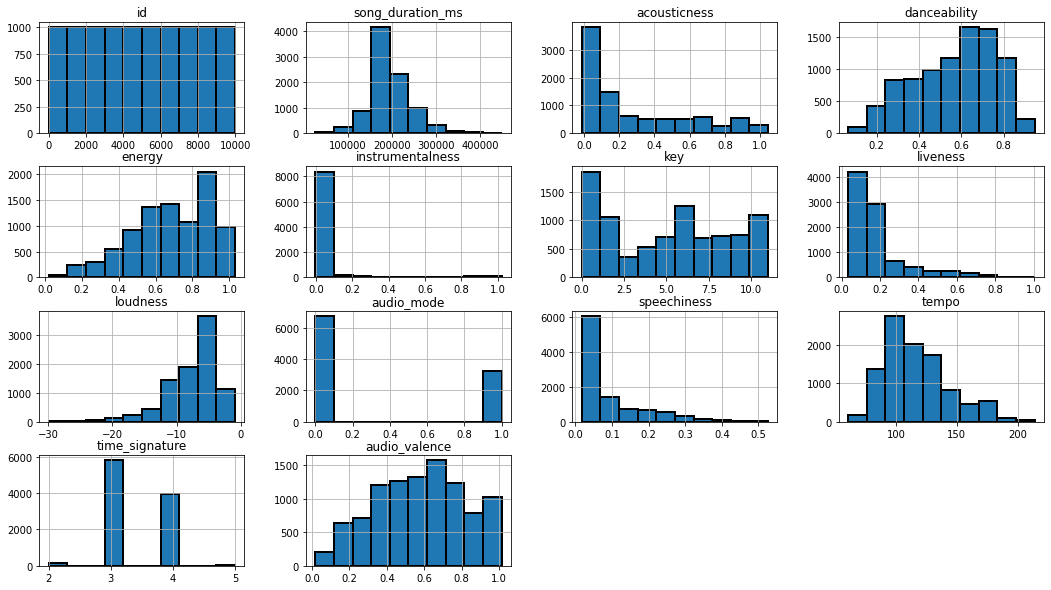

In [5]:
#print('Data distribution of test set')
test.hist(figsize=(18,10), edgecolor='black',linewidth=2);

<li style="font-family:'Goudy Old Style';font-weight: bold;font-size:30px;color: #c1531f  "> Data insight from these hist plot:</li>

><div class="alert alert-info" role="alert">
><ul style="font-family:cursive;font-size:20px;color:  #2025bd">
><li ><b>audio_mode</b> and <b>song_popularity</b> are Binary.</li>
><li >No Data Distribution is Gaussian/Normal Distribution</li>
><li >There are some Categorical Column like <b>key & time_signature</b></li>
><li ><b>All Data are skewed to some extend</b>
    ><li > To remove Skewness we can try following things</b>
    <ul style="font-size:15px;">
        <li><b>Log Transform</b>It can be easily done via Numpy, just by calling the log() function on the desired column.<mark>np.log(df['energy'])</mark></li>
      <li><b>Square Root Transform</b>The square root sometimes works great and sometimes isn’t the best suitable option. In this case, I still expect the transformed distribution to look somewhat exponential, but just due to taking a square root the range of the variable will be smaller.We can apply a square root transformation via Numpy, by calling the sqrt()<mark>np.sqrt(df['energy'])</mark></li>
        <li><b>Box-Cox Transform</b>To use it, your data must be positive — so that can be a bummer sometimes.we can import it from the Scipy library, but the check for the skew we need to convert the resulting Numpy array to a Pandas Series:</li>
    </ul>
></div>

<li style="font-family:'Goudy Old Style';font-weight: bold;font-size:40px;color: #c1531f  "> Checking Correlations</li>

><div class="alert alert-info" role="alert">
><ul style="font-family:cursive;font-size:20px;color:  #2025bd">
><li >Since we have only numerical (Float) type variables we can directly check correlation and obtain some more insights.</li>
></ul>
></div>

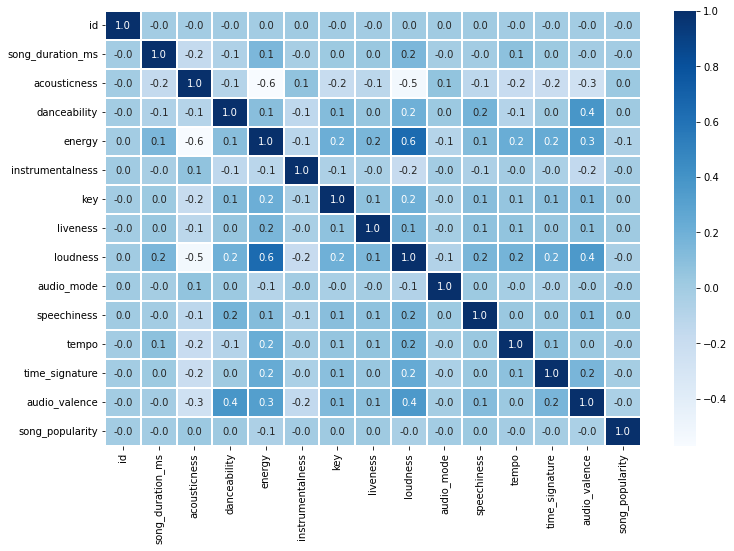

In [6]:
## Looking for correlation among columns
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot= True, cmap='Blues', fmt= ".1f", linewidths=0.01);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                40000 non-null  int64  
 1   song_duration_ms  35899 non-null  float64
 2   acousticness      36008 non-null  float64
 3   danceability      35974 non-null  float64
 4   energy            36025 non-null  float64
 5   instrumentalness  36015 non-null  float64
 6   key               35935 non-null  float64
 7   liveness          35914 non-null  float64
 8   loudness          36043 non-null  float64
 9   audio_mode        40000 non-null  int64  
 10  speechiness       40000 non-null  float64
 11  tempo             40000 non-null  float64
 12  time_signature    40000 non-null  int64  
 13  audio_valence     40000 non-null  float64
 14  song_popularity   40000 non-null  int64  
dtypes: float64(11), int64(4)
memory usage: 4.6 MB


In [8]:
print("unique elements in train set")
display(df.nunique())
print("unique elements in test set")
test.nunique()

unique elements in train set


id                  40000
song_duration_ms    31586
acousticness        36004
danceability        35972
energy              36021
instrumentalness    35999
key                    12
liveness            35911
loudness            36038
audio_mode              2
speechiness         39999
tempo               39993
time_signature          4
audio_valence       39998
song_popularity         2
dtype: int64

unique elements in test set


id                  10000
song_duration_ms     8720
acousticness         9050
danceability         9024
energy               8945
instrumentalness     8999
key                    12
liveness             8993
loudness             8974
audio_mode              2
speechiness         10000
tempo               10000
time_signature          4
audio_valence       10000
dtype: int64

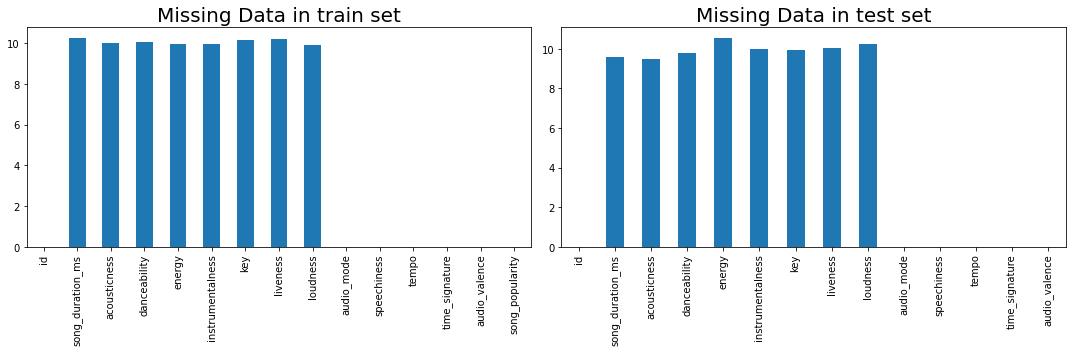

In [9]:
## There are some missing values lets check them out
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
(df.isnull().mean()*100).plot(kind='bar')
plt.title('Missing Data in train set', size=20)

plt.subplot(1,2,2)
(test.isnull().mean()*100).plot(kind='bar')
plt.title('Missing Data in test set', size=20)
plt.tight_layout();

<li style="font-family:'Goudy Old Style';font-weight: bold;font-size:25px;color: #c1531f  "> Missing Data:</li>

<p style="font-family:'Goudy Old Style';font-weight: bold;font-size:20px;color: #c1531f  "> The train set has 32187 missing values, and the test set has 7962.</p>

In [10]:
print("Missing Data in Train set: ", (df.isnull().sum()).sum(), 'which is :',round(100*(df.isnull().sum()).sum()/df.size,2) ,'Percentage')
print("Missing Data in Test set: ", (test.isnull().sum()).sum(), 'which is :',round(100*(test.isnull().sum()).sum()/test.size,2) ,'Percentage')

Missing Data in Train set:  32187 which is : 5.36 Percentage
Missing Data in Test set:  7962 which is : 5.69 Percentage


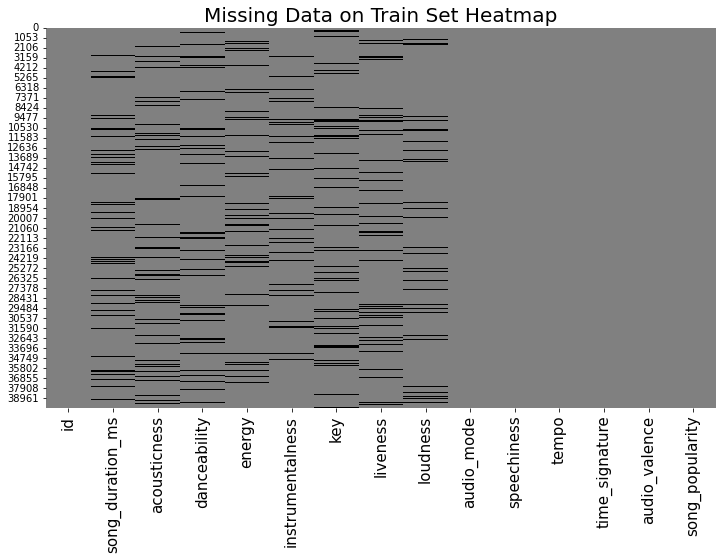

In [11]:
color= ['grey', 'black']
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull(), cmap= color, cbar=False)
plt.title('Missing Data on Train Set Heatmap', fontsize=20)
plt.xticks(fontsize=15);

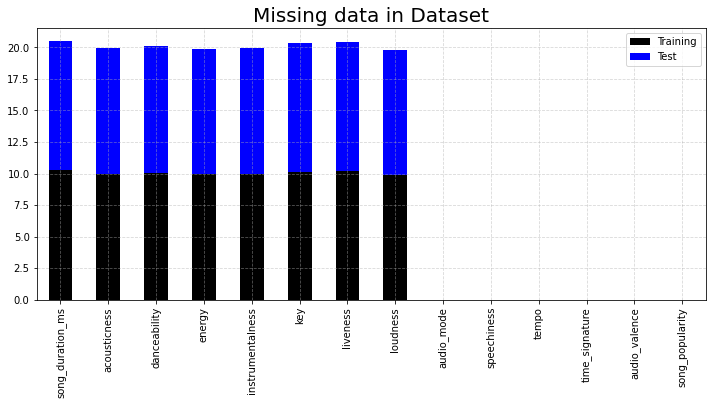

In [12]:
## There are some missing values lets check them out
# colour = sns.color_palette("crest",2)
colour =['Black','Blue'] ## Creating a color palette for graph

missing_data = pd.DataFrame({"Training":df.isnull().mean()*100, "Test" : df.isnull().mean()*100}).drop('id')
missing_data.plot(kind='bar', stacked=True, color = colour,figsize=(12,5))
plt.grid('on', linestyle='--', alpha=0.5)
plt.title("Missing data in Dataset", fontsize=20)
plt.show();

<li style="font-family:'Goudy Old Style';font-weight: bold;font-size:30px;color: #c1531f  "> Conclusion on Missing Data:</li>

><div class="alert alert-info" role="alert">
><ul style="font-family:cursive;font-size:20px;color:  #2025bd">
><li >Missing Data in Train set: 32187 which is : <b>5.36 Percentage of Trainset</b>.</li>
><li >Missing Data in Test set: 7962 which is : <b>5.69 Percentage of Test set</b>.</li>
><li>Not all features have missing values, though. We find them only in the first 8 columns (not counting the id). Consequently, those columns have around 10% missing values.</li>
><li > <b>5-6% is quite a big chunk we need to inspect this and try to find out why data is missing.</b>
    <ul>
      <li>This could have be easy if we know how data was collected.</li>
      <li>We can impute these data by
        <ul>
      <li>filling missing data with default value</li>
      <li>or by filling data with mean</li>
    </ul></li>
    </ul> </li>
></ul>
></div>

# Lets Investigate data further with Descriptive Statistics

In [13]:
df.describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='Blues')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='#5999ff')\
                     .bar(subset=["min",], color='green')\
                     .bar(subset=['50%',], color= 'blue')

,count,mean,std,min,25%,50%,75%,max
song_duration_ms,35899.000000,193165.847572,45822.127679,25658.000000,166254.500000,186660.000000,215116.000000,491671.000000
id,40000.000000,19999.500000,11547.149720,0.000000,9999.750000,19999.500000,29999.250000,39999.000000
tempo,40000.000000,116.562815,26.167911,62.055779,96.995309,113.795959,128.517383,219.163578
loudness,36043.000000,-7.407596,3.877198,-32.117911,-9.578139,-6.345413,-4.620711,-0.877346
key,35935.000000,5.042605,3.372728,0.000000,2.000000,5.000000,8.000000,11.000000
time_signature,40000.000000,3.394375,0.524405,2.000000,3.000000,3.000000,4.000000,5.000000
song_popularity,40000.000000,0.364400,0.481268,0.000000,0.000000,0.000000,1.000000,1.000000
audio_mode,40000.000000,0.321150,0.466924,0.000000,0.000000,0.000000,1.000000,1.000000
acousticness,36008.000000,0.276404,0.297928,-0.013551,0.039618,0.140532,0.482499,1.065284
audio_valence,40000.000000,0.580645,0.237351,0.013398,0.398669,0.598827,0.759635,1.022558


In [14]:
test.describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='Blues')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='#5999ff')\
                     .bar(subset=["min",], color='green')\
                     .bar(subset=['50%',], color= 'blue')


,count,mean,std,min,25%,50%,75%,max
song_duration_ms,9043.000000,193091.108813,46502.319884,25377.000000,166689.000000,186196.000000,215059.000000,448558.000000
id,10000.000000,4999.500000,2886.895680,0.000000,2499.750000,4999.500000,7499.250000,9999.000000
tempo,10000.000000,116.460635,26.320082,60.702888,96.951325,113.258381,128.020862,213.922252
loudness,8974.000000,-7.422145,3.902743,-29.887298,-9.654517,-6.346205,-4.605297,-0.879306
key,9008.000000,5.012544,3.387481,0.000000,2.000000,5.000000,8.000000,11.000000
time_signature,10000.000000,3.391800,0.529075,2.000000,3.000000,3.000000,4.000000,5.000000
audio_mode,10000.000000,0.323800,0.467948,0.000000,0.000000,0.000000,1.000000,1.000000
acousticness,9050.000000,0.280280,0.299971,-0.013585,0.042181,0.141564,0.493003,1.046311
audio_valence,10000.000000,0.576109,0.236501,0.017450,0.395860,0.588477,0.755265,1.013865
energy,8945.000000,0.683552,0.212561,0.020959,0.541975,0.700278,0.870670,1.031383


In [15]:
### Check for Duplicates
print("Duplicate entery in train dataset",df.duplicated().sum())
print("Duplicate entery in test dataset",test.duplicated().sum())

Duplicate entery in train dataset 0
Duplicate entery in test dataset 0


<li style="font-family:'Goudy Old Style';font-weight: bold;font-size:30px;color: #c1531f  "> Insight from Descriptive Statistics:</li>

><div class="alert alert-info" role="alert">
><ul style="font-family:cursive;font-size:20px;color:  #2025bd">
><li >Tempo loudness, key and song Duration are having very high STD meaning that most of the numbers are far away from mean value. Thus implementing values are spread out over a wide range.</li>
><li >Where as other columns values are close to mean.</li>
><li >This Dataset have no Duplicate values (or rows).</li>
><li ><b>We can Normalize or Standardize this dataset for better analysis</b></li>
    </ul>
></div>

<li style="font-family:'Goudy Old Style';font-weight: bold;font-size:40px;color: #c1531f  ">Outlier Detection</li>

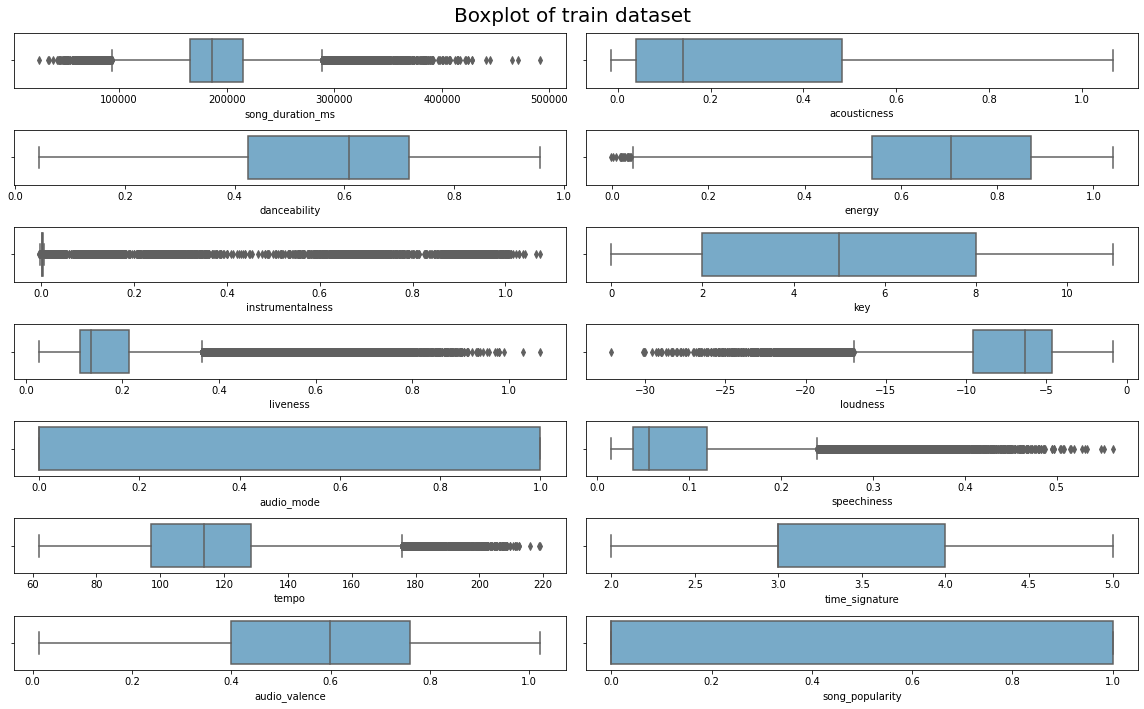

In [16]:
j=1
plt.figure(figsize=(16,10))
for i in df:
    if i != 'id':
        plt.subplot(7,2,j)
        sns.boxplot(df[i], palette='Blues')
        plt.suptitle('Boxplot of train dataset', size=20)
        j=j+1
        plt.tight_layout()

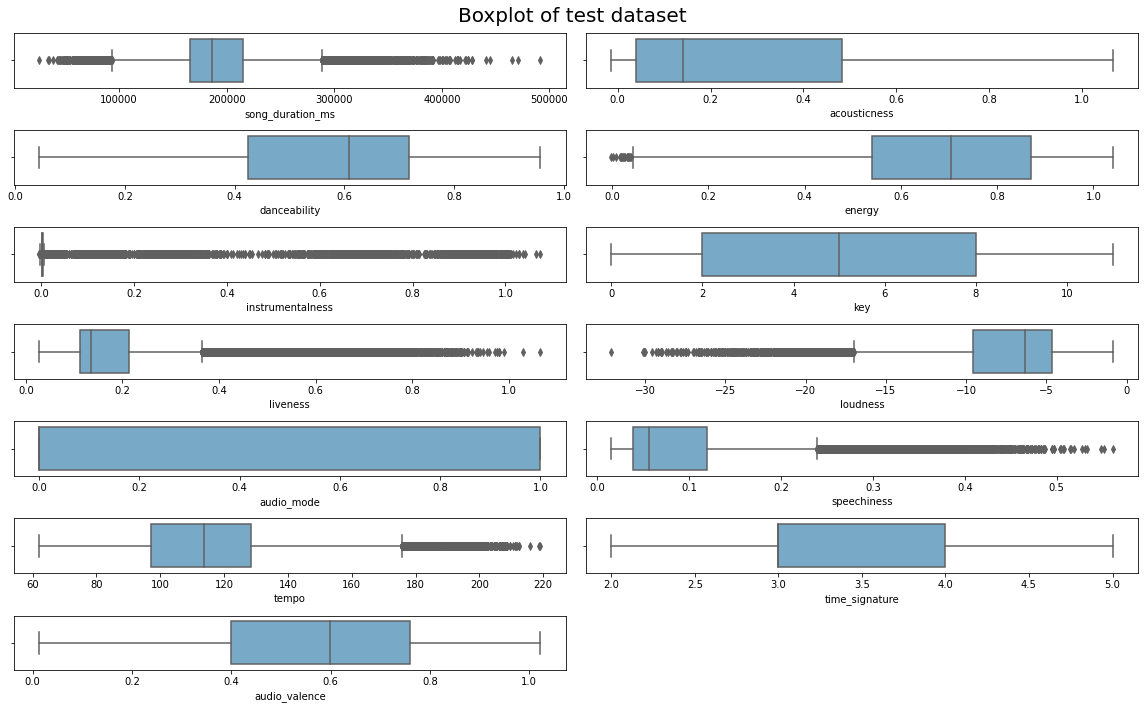

In [17]:
j=1
plt.figure(figsize=(16,10))
for i in test:
    if i != 'id':
        plt.subplot(7,2,j)
        plt.suptitle('Boxplot of test dataset', size=20)
        sns.boxplot(df[i], palette='Blues')
        j=j+1
        plt.tight_layout()

<li style="font-family:'Goudy Old Style';font-weight: bold;font-size:40px;color: #c1531f  "> Observations:</li>

><div class="alert alert-info" role="alert">
><ul style="font-family:cursive;font-size:20px;color:  #2025bd">
><li >There are many Outliers and must be treated before finalizing the model.</li>
><li >Some ways could be to use Flooring, Capping methods etc.</li>
><li style="font-size:25px;" >Or we can use Algo which are not sensitive to outliers as there are many outliers</li>
></ul>
><ul style="font-family:cursive;font-size:20px;color:  #2025bd">Which Machine LEarning Models Are Sensitive To Outliers?.
><li >Naivye Bayes Classifier------------------- Not Sensitive To Outliers</li>
><li >SVM--------------------------------------- Not Sensitive To Outliers.</li>
><li >Decision Tree Regressor or Classifier---- Not Sensitive To Outliers</li>
><li >Ensemble(RF,XGboost,GB)------------------ Not Sensitive To Outliers</li>
><li >Naivye Bayes Classifier------------------- Not Sensitive To Outliers</li>
><li >KNN---------------------------------------- Not Sensitive To Outliers</li>
><li >Linear Regression-------------------------- Sensitive To Outliers</li>
><li >Logistic Regression------------------------ Sensitive To Outliers</li>
><li >Kmeans------------------------------------- Sensitive To Outliers</li>
><li >Hierarichal-------------------------------- Sensitive To Outliers</li>
><li >PCA---------------------------------------- Sensitive To Outliers</li>
><li >Neural Networks---------------------------- Sensitive To Outliers</li>
></ul>
></div>

<li style="font-family:'Goudy Old Style';font-weight: bold;font-size:40px;color: #c1531f  "> Data Visualization:</li>

In [18]:
TARGET = 'song_popularity'
FEATURES = [col for col in df.columns if col not in ['id', TARGET]]
RANDOM_STATE = 7

Total number of features: 13
Number of categorical features: 3
Number of continuos features: 10


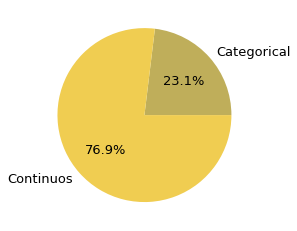

In [19]:
df_new = pd.concat([df[FEATURES], test[FEATURES]], axis=0)

cat_features = [col for col in FEATURES if df_new[col].nunique() < 15]
cont_features = [col for col in FEATURES if df_new[col].nunique() >= 15]

del df_new  ### Delete this new df to save memory
print(f'Total number of features: {len(FEATURES)}')
print(f'\033[92mNumber of categorical features: {len(cat_features)}')
print(f'\033[96mNumber of continuos features: {len(cont_features)}')

plt.pie([len(cat_features), len(cont_features)], 
        labels=['Categorical', 'Continuos'],
        colors=['#BFAE5A', '#f0cd51'],
        textprops={'fontsize': 13},
        autopct='%1.1f%%')
plt.show()

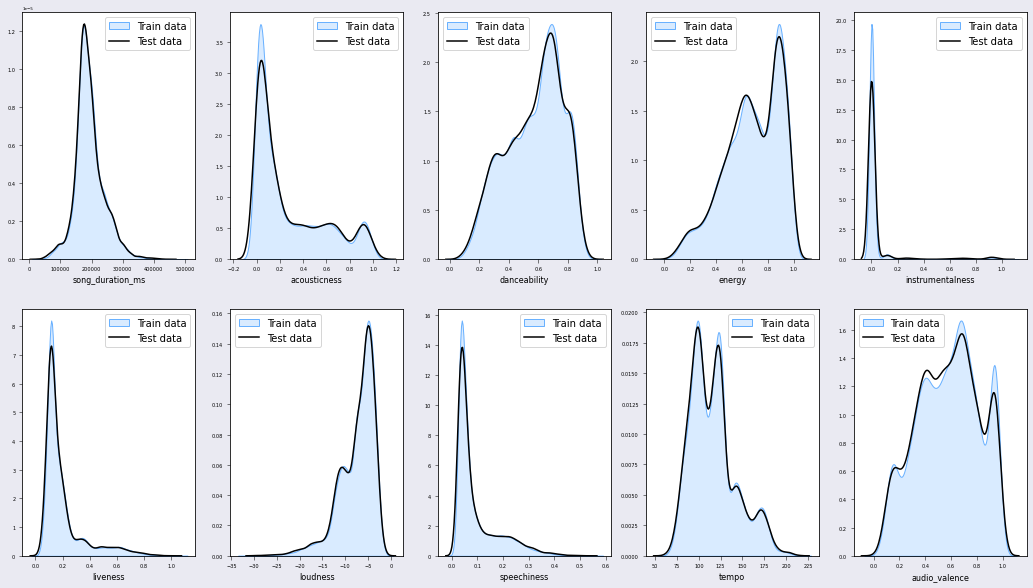

In [20]:
ncols = 5
nrows = int(len(cont_features) / ncols + (len(FEATURES) % ncols > 0))-1

fig, axes = plt.subplots(nrows, ncols, figsize=(18, 10), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = cont_features[r*ncols+c]
        sns.kdeplot(x= df[col], ax=axes[r, c], color='#69b1ff', label='Train data' , fill =True)
        sns.kdeplot(x=test[col], ax=axes[r, c], color='black', label='Test data')
        axes[r,c].legend()
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=8)
        axes[r, c].tick_params(labelsize=5, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(4)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
plt.show()

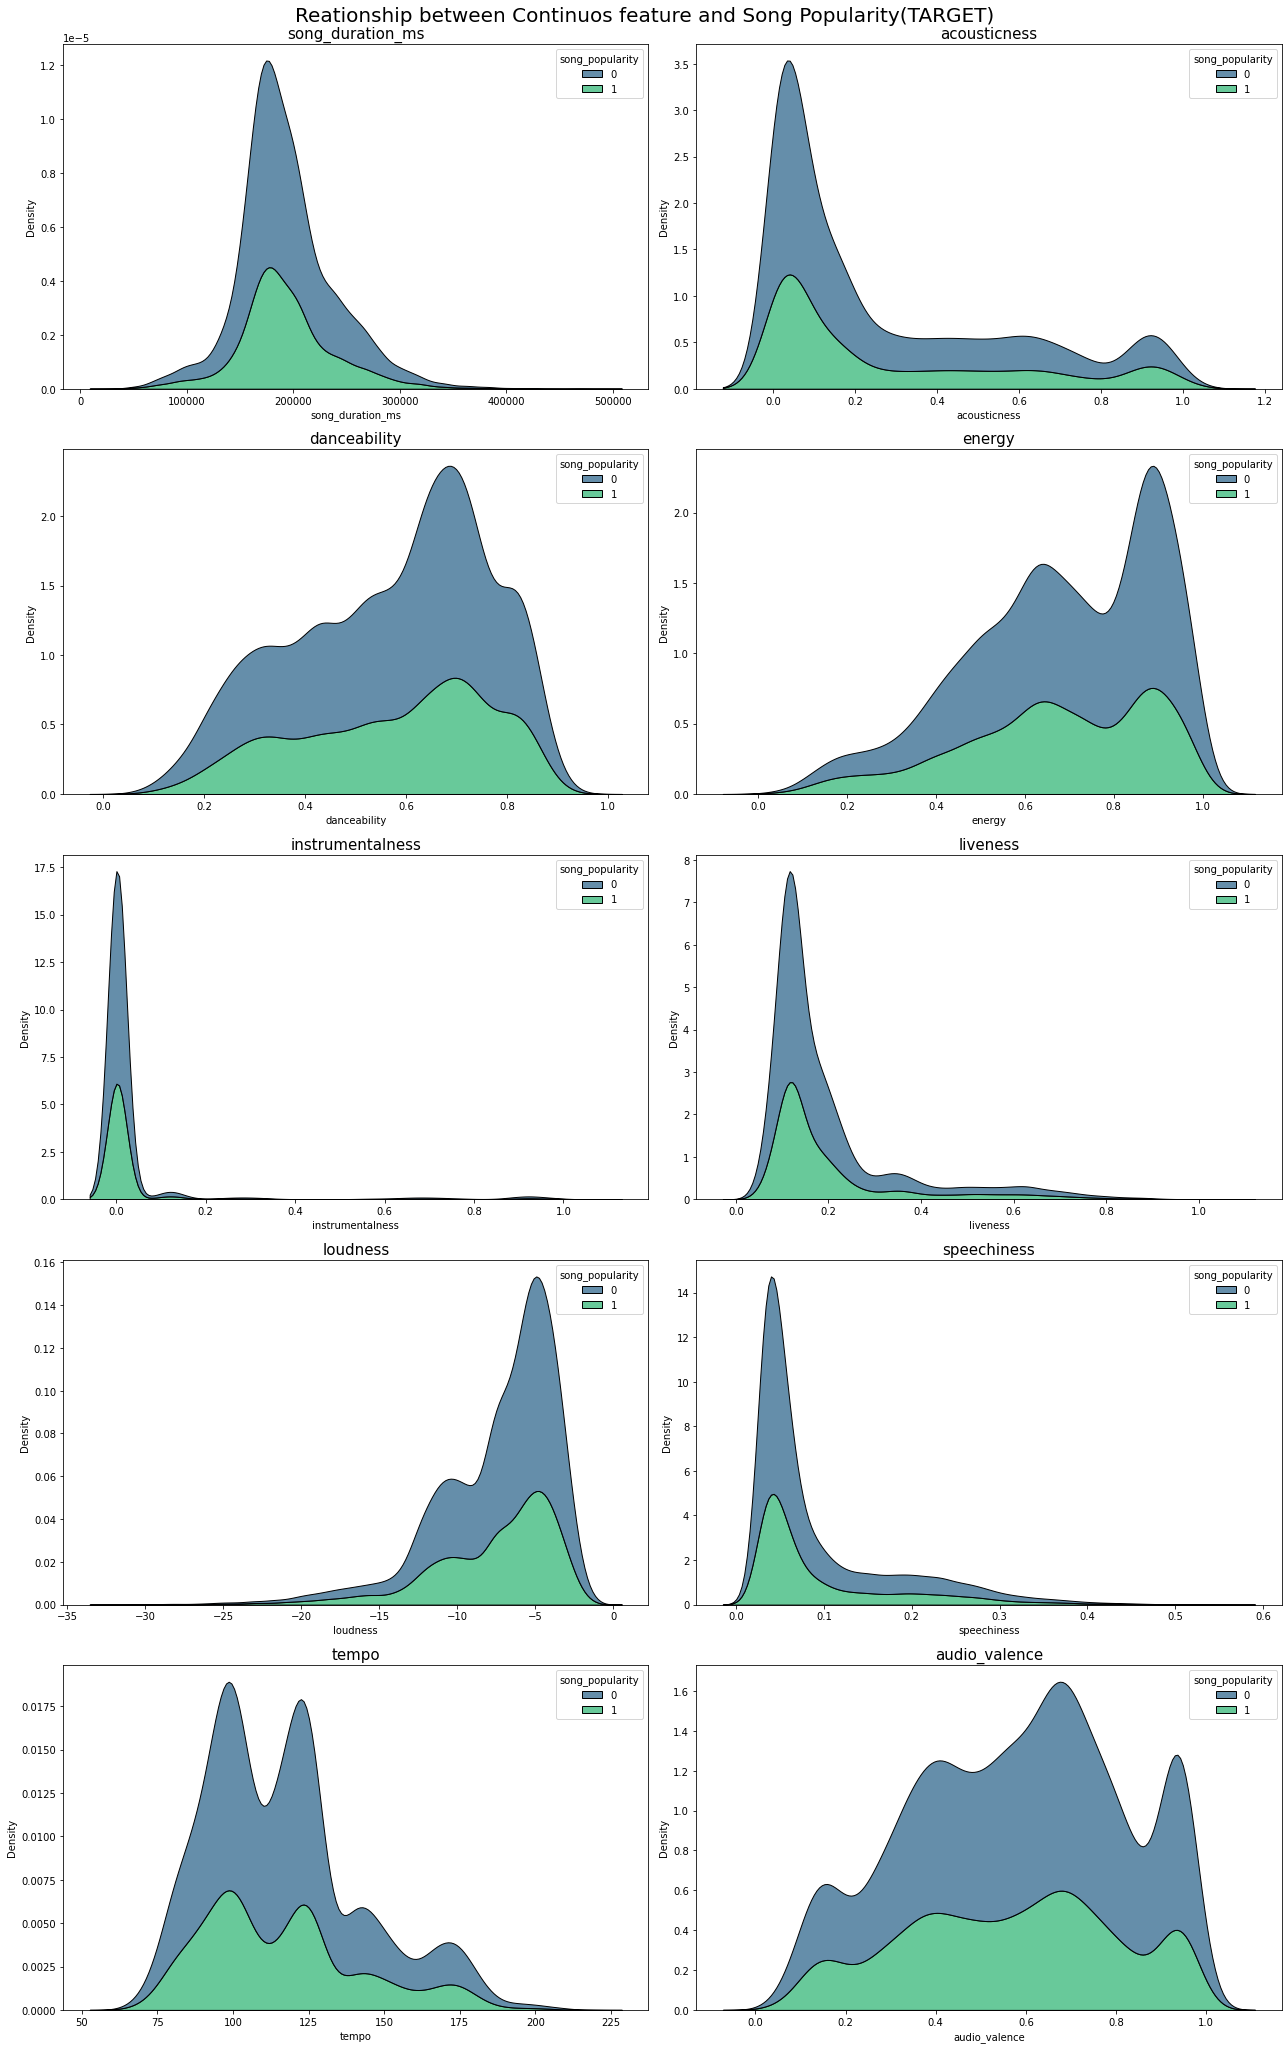

In [21]:
### Here we will check for relationship between cont features and popularity
j=1
plt.figure(figsize=(18,29))
for i in cont_features:
    plt.subplot(5,2,j)
    #sns.kdeplot(x= df[i], hue=df['song_popularity'] , fill =True)
    sns.kdeplot(x= df[i], hue=df['song_popularity'] , palette="viridis",multiple="stack")
    plt.title(i, fontsize=15)
    j=j+1
plt.suptitle("Reationship between Continuos feature and Song Popularity(TARGET)", fontsize=20)
plt.tight_layout(rect=[0,0,1,0.99])  ### After some trial and error :: recttuple (left, bottom, right, top), default: (0, 0, 1, 1)
plt.plot();

We need to perfrom transformation on **instrumentainess** as feature like this are `probably not good enough for its own`
> **liveness,loudness & speechness** also heavily skewed

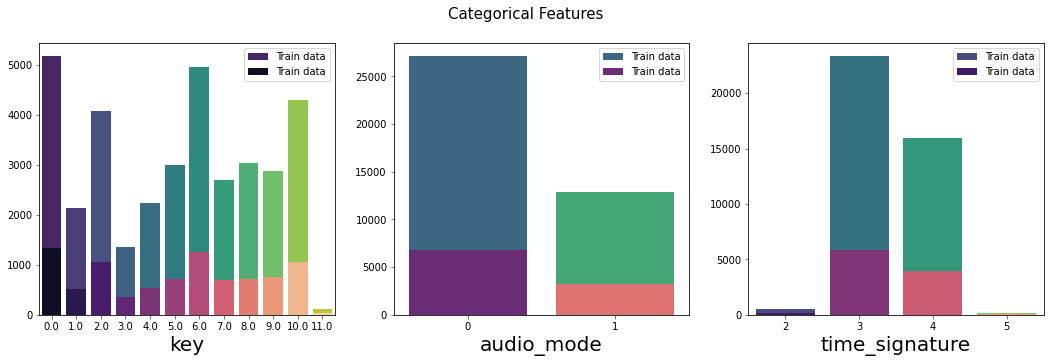

In [22]:
if len(cat_features) == 0 :
    print("No Categorical features")
else:
    ncols = 3
    nrows = 1

    fig, axes = plt.subplots(nrows, ncols, figsize=(18, 5))
    for r in range(nrows):
        for c in range(ncols):
            col = cat_features[c]
            sns.countplot(df[col],ax = axes[c] ,palette = "viridis", label='Train data')
            sns.countplot(test[col],ax = axes[c] ,palette = "magma", label='Train data')
            axes[c].legend()
            axes[c].set_ylabel('')
            axes[c].set_xlabel(col, fontsize=20)
            axes[c].tick_params(labelsize=10, width=0.5)
            axes[c].xaxis.offsetText.set_fontsize(4)
            axes[c].yaxis.offsetText.set_fontsize(4)
            plt.suptitle("Categorical Features",fontsize=15)
    plt.show()

# Model + pipeline Creation

In [23]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler  ### To Standardise the data 
from sklearn.pipeline import Pipeline     ### To create pipeline
from sklearn.impute import SimpleImputer ### To handle missing data

### Will Create a 6 Model Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

<li style="font-family:'Goudy Old Style';font-weight: bold;font-size:40px;color: #c1531f  "> Data Preparation for Model:</li>

#### Note: Why I will be not perfroming Feature Scaling.
* Transforming Data For Skewness : We need to correct skewness before model creation as it impact algo for both Reg and Classification
* Some columns have very large range and STD in these case feature scaling might be benificial. But I won't be performing these as I will be using Tree based models mostly.
* **Normalization:** Scale between 0 to 1. AKA `Min Max Scaler` [**Formula: Xnormal = (X - Xmin)/(Xmax - Xmin)**]
        from sklearn.preprocessing import MinMaxScaler
* **Standardization:** This help us scale down the feature based on standard normal distribution (i.e. in this case **mean =0 and std=1**). Library name `StandardScaler` [**Formula z= (x-μ)/σ**]
        from sklearn.preprocessing import StandardScaler
        Sample code
        from sklearn.preprocessing import StandardScaler
        scaling = StandardScaler()
        scaled_numpy = scaling.fit_transform(x_train) ## This will return a numpy array
        Scaled_df= pd.DataFrame(scaled_numpy, columns = ['Column_A','Column_B','Column_C']) ### columns accept list so we can pass FEATURES
        
### When to use `Normalization` and `Standardization`?
* In ML or Dl which involves `Euclidean Distance` or `Gradient Descent` or any other distance we need to use feature scaling.
* As this will make the computation faster as **range will reduced** so weather its GD finding **global minima** on parabolic curve or 
* ML models like KNN, K-Means Clustering, Linearn Regression(we also consider GD), Logistic Regression.
* Normalization Mostly in Deep Learning Becasue we need to scale down the value bet 0 to 1. For Example in case of CNN (0 to 255 normalized to 0 to 1, now we can't use standardization as it will change the pixels of image)
* Standardization Mostly for ML.

In [24]:
x= df[FEATURES]
y= df[TARGET]

In [25]:
### Spliting data  
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=7)

<li style="font-family:'Goudy Old Style';font-weight: bold;font-size:40px;color: #c1531f  "> Pipelines:</li>

<p style="font-family:'Goudy Old Style';font-weight: bold;font-size:20px;color: #c1531f  "> Pipelines are a simple way to keep your data preprocessing and modeling code organized. Specifically, a pipeline bundles preprocessing and modeling steps so you can use the whole bundle as if it were a single step.</p>

><div class="alert alert-info" role="alert">
><ul style="font-family:cursive;font-size:20px;color:  #2025bd">
><li ><b>Cleaner Code:</b> Accounting for data at each step of preprocessing can get messy. With a pipeline, you won't need to manually keep track of your training and validation data at each step.</li>
><li ><b>Fewer Bugs:</b> There are fewer opportunities to misapply a step or forget a preprocessing step.</li>
><li><b>Easier to Productionize:</b> It can be surprisingly hard to transition a model from a prototype to something deployable at scale. We won't go into the many related concerns here, but pipelines can help.</li>
><li > <b>More Options for Model Validation:</b> You will see an example in the next tutorial, which covers cross-validation.</li>
></ul>
></div>

In [26]:
### Creating Pipeline
pipeline_lr=Pipeline([('imputer', SimpleImputer(strategy='mean')),
                     ('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('lr_classifier',LogisticRegression(random_state=0))])

pipeline_dt=Pipeline([('imputer', SimpleImputer(strategy='mean')),('dt_classifier',DecisionTreeClassifier())])

pipeline_randomforest=Pipeline([('imputer', SimpleImputer(strategy='mean')),('rf_classifier',RandomForestClassifier())])

pipeline_xgb=Pipeline([('imputer', SimpleImputer(strategy='mean')),('scalar1',StandardScaler()),('xgb_classifier',XGBClassifier())])

pipeline_cat=Pipeline([('imputer', SimpleImputer(strategy='mean')),('scalar1',StandardScaler()),('cat_classifier',CatBoostClassifier())])

pipeline_lgbm =Pipeline([('imputer', SimpleImputer(strategy='mean')),('lgbm_classifier',LGBMClassifier())])

## Lets make the list of pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest,pipeline_xgb, pipeline_cat, pipeline_lgbm ]

best_accuracy=0.0
best_classifier=0
best_pipeline=""

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest' , 3: 'XGBoost', 4: 'CatBoost', 5: 'LightGBM'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(x_train, y_train)

[13:12:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.041952
0:	learn: 0.6897815	total: 61.9ms	remaining: 1m 1s
1:	learn: 0.6866372	total: 69ms	remaining: 34.4s
2:	learn: 0.6838249	total: 75.7ms	remaining: 25.2s
3:	learn: 0.6811391	total: 82.8ms	remaining: 20.6s
4:	learn: 0.6788134	total: 89ms	remaining: 17.7s
5:	learn: 0.6766698	total: 95.8ms	remaining: 15.9s
6:	learn: 0.6745525	total: 101ms	remaining: 14.4s
7:	learn: 0.6726608	total: 108ms	remaining: 13.4s
8:	learn: 0.6708593	total: 114ms	remaining: 12.6s
9:	learn: 0.6692217	total: 121ms	remaining: 11.9s
10:	learn: 0.6677282	total: 128ms	remaining: 11.5s
11:	learn: 0.6662632	total: 134ms	remaining: 11.1s
12:	learn: 0.6649145	total: 141ms	remaining: 10.7s
13:	learn: 0.6636719	total: 148ms	remaining: 10.4s
14:	learn: 0

`Self Note:` I tried to standardized different models in pipeline but it didn't create much impact. In next notebook try different transform like log, sqrt etc and target on skewness.

In [27]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(x_test,y_test)))

Logistic Regression Test Accuracy: 0.6363636363636364
Decision Tree Test Accuracy: 0.5478030303030303
RandomForest Test Accuracy: 0.6301515151515151
XGBoost Test Accuracy: 0.615530303030303
CatBoost Test Accuracy: 0.6313636363636363
LightGBM Test Accuracy: 0.6341666666666667


In [28]:
for i,model in enumerate(pipelines):
    if model.score(x_test,y_test)>best_accuracy:
        best_accuracy=model.score(x_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:Logistic Regression


In [29]:
## creating sub file
test_fin= test[FEATURES]

lr_pred= pipelines[0].predict(test_fin)
dt_pred= pipelines[1].predict(test_fin)
rf_pred= pipelines[2].predict(test_fin)
xgb_pred= pipelines[3].predict(test_fin)
cat_pred= pipelines[4].predict(test_fin)
lgbm_pred= pipelines[5].predict(test_fin)

lr_submission = sub.copy()
lr_submission['song_popularity'] = lr_pred
lr_submission.to_csv("lr-subs.csv",index=False)


dt_submission = sub.copy()
dt_submission['song_popularity'] = dt_pred
dt_submission.to_csv("dt-subs.csv",index=False)


rf_submission = sub.copy()
rf_submission['song_popularity'] = rf_pred
rf_submission.to_csv("rf-subs.csv",index=False)

xgb_submission = sub.copy()
xgb_submission['song_popularity'] = xgb_pred
xgb_submission.to_csv("xgb-subs.csv",index=False)


cat_submission = sub.copy()
cat_submission['song_popularity'] = cat_pred
cat_submission.to_csv("cat-subs.csv",index=False)

lgbm_submission = sub.copy()
lgbm_submission['song_popularity'] = lgbm_pred
lgbm_submission.to_csv("lgbm-subs.csv",index=False)


<p style="font-family:'Goudy Old Style';font-weight: bold;font-size:20px;color: #c1531f  "> Classifier with best accuracy :Logistic Regression, followed by CatBoosting and LightGBM (all Without Hyperparameter Tuning)</p>


<li style="font-family:'Goudy Old Style';font-weight: bold;font-size:60px;color: #c1531f; text-align: center; "> Thank you !!</li>